# Predicting the progression of diabetes using least-squares regression

## 1. Set up notebook and load data set

In [3]:
# Standard includes
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# Routines for linear regression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
# Set label size for plots
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14)

In [2]:
data = np.genfromtxt('C:/Users/tp179902741/Documents/Machine_learning/diabetes-regression/diabetes-data.csv', delimiter=',')
features = ['age', 'sex', 'body mass index', 'blood pressure', 
            'serum1', 'serum2', 'serum3', 'serum4', 'serum5', 'serum6']
x = data[:,0:10] # predictors
y = data[:,10] # response variable

## 2. Predict `y` without using `x`

In [4]:
print ("Prediction: ", np.mean(y))
print ("Mean squared error: ", np.var(y))

Prediction:  152.133484163
Mean squared error:  5929.88489691


## 3. Predict `y` using a single feature of `x`

In [37]:
def one_feature_regression(x,y,f):
    if (f < 0) or (f > 9):
        print ("Feature index is out of bounds")
        return
    regr = linear_model.LinearRegression()
    x1 = x[:,[f]]
    regr.fit(x1, y)
    # Make predictions using the model
    y_pred = regr.predict(x1)
    # Plot data points as well as predictions
#     plt.plot(x1, y, 'bo')
#     plt.plot(x1, y_pred, 'r-', linewidth=3)
#     plt.xlabel(features[f], fontsize=14)
#     plt.ylabel('Progression of disease', fontsize=14)
#     plt.show()
#    print ("Mean squared error: ", mean_squared_error(y, y_pred))
#    return mean_squared_error(y, y_pred)
    return regr

In [39]:
regr = one_feature_regression(x,y,2)
print ("w = ", regr.coef_)
print ("b = ", regr.intercept_)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [28]:
results = []
for i in range(10):
    results += [one_feature_regression(x,y,i)]
results

[5720.5470172056466,
 5918.8888995860216,
 3890.4565854612729,
 4774.1139023686874,
 5663.3156237393541,
 5750.2411026777818,
 5005.6616207106517,
 4831.1383864340896,
 4030.9987225912869,
 5062.3805945205413]

## 3. Predict `y` using a specified subset of features from `x`

In [29]:
def feature_subset_regression(x,y,flist):
    if len(flist) < 1:
        print ("Need at least one feature")
        return
    for f in flist:
        if (f < 0) or (f > 9):
            print ("Feature index is out of bounds")
            return
    regr = linear_model.LinearRegression()
    regr.fit(x[:,flist], y)
    return regr

In [34]:
# flist = [2,8]
regr = feature_subset_regression(x,y,range(0,10))
print ("w = ", regr.coef_)
print ("b = ", regr.intercept_)
print ("Mean squared error: ", mean_squared_error(y, regr.predict(x)))

w =  [ -3.63612242e-02  -2.28596481e+01   5.60296209e+00   1.11680799e+00
  -1.08999633e+00   7.46450456e-01   3.72004715e-01   6.53383194e+00
   6.84831250e+01   2.80116989e-01]
b =  -334.567138519
Mean squared error:  2859.69634759


## 4. Splitting the data into a training and test set

In [35]:
def split_data(n_train):
    if (n_train < 0) or (n_train > 442):
        print ("Invalid number of training points")
        return
    np.random.seed(0)
    perm = np.random.permutation(442)
    training_indices = perm[range(0,n_train)]
    test_indices = perm[range(n_train,442)]
    trainx = x[training_indices,:]
    trainy = y[training_indices]
    testx = x[test_indices,:]
    testy = y[test_indices]
    return trainx, trainy, testx, testy

In [36]:
trainx, trainy, testx, testy = split_data(100)

In [40]:
regr = feature_subset_regression(trainx,trainy,range(0,10))
print(mean_squared_error(trainy, regr.predict(trainx)))

2883.77852012


In [41]:
#regr = feature_subset_regression(trainx,trainy,range(0,10))
print(mean_squared_error(testy, regr.predict(testx)))

3583.00851153


In [43]:
trainx, trainy, testx, testy = split_data(20)
regr = feature_subset_regression(trainx,trainy,range(0,10))
print("training error on 20 training points", mean_squared_error(trainy, regr.predict(trainx)))
print("test error on 20 training points", mean_squared_error(testy, regr.predict(testx)))

training error on 20 training points 1636.14259227
test error on 20 training points 6764.18724369


In [44]:
trainx, trainy, testx, testy = split_data(400)
regr = feature_subset_regression(trainx,trainy,range(0,10))
print("training error on 400 training points" , mean_squared_error(trainy, regr.predict(trainx)))
print("test error on 400 training points" , mean_squared_error(testy, regr.predict(testx)))

training error on 400 training points 2825.47304563
test error on 400 training points 3262.76549382


# Ridge and Lasso Regression 

In [52]:
import pandas as pd
# from sklearn.linear_model import Lasso
# from sklearn.linear_model import Ridge

In [2]:
data = np.loadtxt('C:/Users/tp179902741/Documents/Machine_learning/mystery.dat',delimiter=',')

# Separate features from labels
x = data[:,0:100]
y = data[:,100]

In [46]:
data.shape

(101, 101)

In [5]:
def lasso_regression(data, predictors):
    regr = linear_model.LinearRegression()
    regr.fit(data, predictors)
    return regr

In [8]:
regr = lasso_regression(x, y)

In [9]:
len(regr.coef_)

100

In [11]:
inds = np.argsort(regr.coef_)
neg_inds = inds[0:10]
pos_inds = inds[-9:-1]
print(neg_inds,pos_inds)

[92 63  9 44 99 41  7 88 30 16] [11 61 83 96 23 20  1 40]


In [14]:
np.sort(regr.coef_)

array([-36.86086585, -34.15217277, -33.02505161, -31.04453888,
       -29.10575762, -27.42588293, -26.24789148, -26.13113306,
       -24.73767002, -23.11338305, -21.23262124, -20.54216865,
       -20.47715298, -19.8302514 , -19.05026195, -18.81642585,
       -17.73085803, -17.34996285, -16.2930732 , -15.38912945,
       -14.84899384, -14.24146188, -13.45838974, -13.18719081,
       -13.12389283, -13.11603558, -12.84425923, -12.40941302,
       -12.29939822, -10.62381041,  -9.90294585,  -9.68143955,
        -8.90551105,  -8.83892388,  -8.7822912 ,  -8.49306744,
        -6.39437977,  -5.07503488,  -5.04859173,  -4.72916532,
        -4.64908799,  -4.57261591,  -4.34514772,  -4.31060888,
        -3.2144711 ,  -2.80507449,  -2.77403478,  -2.52897667,
        -2.31722156,  -2.12913828,  -1.91294727,  -1.27906908,
        -1.12470876,  -0.55904996,   0.4619578 ,   1.45021208,
         1.51355527,   1.98326772,   2.01394885,   2.75408536,
         2.85842673,   2.90628928,   3.65275455,   4.35

In [13]:
inds

array([92, 63,  9, 44, 99, 41,  7, 88, 30, 16, 51, 70, 10, 90, 49, 12, 98,
       32, 17, 68, 73, 37, 95, 64, 22, 55, 45,  5, 24, 78, 38, 76, 89, 29,
       35,  0, 93, 79, 53, 57,  3, 25, 85, 58,  8, 31, 81, 94, 60, 33, 86,
        2, 62, 50, 67, 21, 74, 13, 28, 82, 48, 52, 72, 47, 15, 46, 27, 66,
        4, 42, 80, 71, 65, 59, 87, 26, 36, 75, 77, 69, 34, 18, 19, 43,  6,
       97, 56, 84, 14, 54, 91, 11, 61, 83, 96, 23, 20,  1, 40, 39], dtype=int64)

In [12]:
regr.coef_

array([ -8.49306744,  26.98762719,  -1.27906908,  -4.64908799,
         5.72291521, -12.40941302,  16.06529835, -26.24789148,
        -3.2144711 , -33.02505161, -20.47715298,  19.68286928,
       -18.81642585,   1.98326772,  18.18886875,   4.38141419,
       -23.11338305, -16.2930732 ,  14.16373337,  14.87128385,
        24.03007414,   1.45021208, -13.12389283,  21.31900346,
       -12.29939822,  -4.57261591,   9.62579424,   5.35751097,
         2.01394885,  -8.83892388, -24.73767002,  -2.80507449,
       -17.34996285,  -2.12913828,  13.66242966,  -8.7822912 ,
        10.38855614, -14.24146188,  -9.90294585,  32.19189603,
        30.2439122 , -27.42588293,   6.25641416,  15.04473187,
       -31.04453888, -12.84425923,   5.00599422,   4.3505104 ,
         2.85842673, -19.05026195,  -0.55904996, -21.23262124,
         2.90628928,  -5.04859173,  18.41317443, -13.11603558,
        17.47971735,  -4.72916532,  -4.31060888,   9.02509676,
        -2.31722156,  20.40848143,  -1.12470876, -34.15

In [ ]:
vocab = np.array([z[0] for z in sorted(vectorizer.vocabulary_.items(), key=lambda x:x[1])], order='K')

## Get indices of sorting w
inds = np.argsort(w)

## Words with large negative values
neg_inds = inds[0:50]
print("Highly negative words: ")
print([str(x) for x in list(vocab[neg_inds])])

## Words with large positive values
pos_inds = inds[-49:-1]
print("Highly positive words: ")
print([str(x) for x in list(vocab[pos_inds])])

In [55]:
def lasso_regression(data, predictors, alpha):
    #Fit the model
    lassoreg = Lasso(alpha=alpha,normalize=True)
    lassoreg.fit(data,predictors)
    y_pred = lassoreg.predict(data)
    
    #Return
    rss = sum((y_pred-predictors)**2)
    ret = [rss]
    ret.extend([lassoreg.intercept_])
    ret.extend(lassoreg.coef_)
    return ret

In [68]:
#Define the alpha values to test
alpha_lasso = [0.007, 0.01,0.03,0.07,0.1]

#Initialize the dataframe to store coefficients
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,101)]
ind = ['alpha_%.2g'%alpha_lasso[i] for i in range(5)]
coef_matrix_lasso = pd.DataFrame(index=ind, columns=col)

#another table
#result = pd.DataFrame(index = np.arange(100))

#Iterate over the 10 alpha values:
for i in range(5):
    coef_matrix_lasso.iloc[i,] = lasso_regression(x, y, alpha_lasso[i])
    
#Get index
list1 = []
for i in range(5):
    filter = coef_matrix_lasso.iloc[i] > 0
    list1 += [coef_matrix_lasso.iloc[i].index[filter]]

In [69]:
list1

[Index(['rss', 'coef_x_2', 'coef_x_3', 'coef_x_5', 'coef_x_7', 'coef_x_11',
        'coef_x_13', 'coef_x_17', 'coef_x_19', 'coef_x_20', 'coef_x_21',
        'coef_x_23', 'coef_x_29', 'coef_x_32', 'coef_x_49', 'coef_x_50',
        'coef_x_54', 'coef_x_56', 'coef_x_57', 'coef_x_70', 'coef_x_73',
        'coef_x_76', 'coef_x_78', 'coef_x_81', 'coef_x_92', 'coef_x_93',
        'coef_x_97', 'coef_x_100'],
       dtype='object'),
 Index(['rss', 'coef_x_2', 'coef_x_3', 'coef_x_5', 'coef_x_7', 'coef_x_11',
        'coef_x_13', 'coef_x_17', 'coef_x_19', 'coef_x_20', 'coef_x_21',
        'coef_x_23', 'coef_x_29', 'coef_x_42', 'coef_x_49', 'coef_x_50',
        'coef_x_56', 'coef_x_57', 'coef_x_70', 'coef_x_73', 'coef_x_76',
        'coef_x_78', 'coef_x_81', 'coef_x_92'],
       dtype='object'),
 Index(['rss', 'coef_x_2', 'coef_x_3', 'coef_x_5', 'coef_x_7', 'coef_x_11',
        'coef_x_13', 'coef_x_17', 'coef_x_19', 'coef_x_23', 'coef_x_29',
        'coef_x_78', 'coef_x_81'],
       dtype='object'

In [ ]:

def ridge_regression(data, predictors, alpha):
    #Fit the model
    ridgereg = Ridge(alpha=alpha,normalize=True)
    ridgereg.fit(data[predictors],data['y'])
    y_pred = ridgereg.predict(data[predictors])

# Sentiment analysis using logistic regression

## 1. Set up notebook, load and preprocess data

In [1]:
%matplotlib inline
import string
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14)

In [3]:
## Read in the data set.
with open("C:/Users/tp179902741/Documents/Machine_learning/sentiment-logistic-regression/sentiment_labelled_sentences/full_set.txt") as f:
    content = f.readlines()
    
## Remove leading and trailing white space
content = [x.strip() for x in content]

## Separate the sentences from the labels
sentences = [x.split("\t")[0] for x in content]
labels = [x.split("\t")[1] for x in content]

## Transform the labels from '0 v.s. 1' to '-1 v.s. 1'
y = np.array(labels, dtype='int8')
y = 2*y - 1

In [4]:
content[:5]

['So there is no way for me to plug it in here in the US unless I go by a converter.\t0',
 'Good case, Excellent value.\t1',
 'Great for the jawbone.\t1',
 'Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!\t0',
 'The mic is great.\t1']

### Preprocessing the text data
1. Remove punctuation and numbers.
2. Transform all words to lower-case.
3. Remove _stop words_.
4. Convert the sentences into vectors, using a bag-of-words representation.

In [5]:
## full_remove takes a string x and a list of characters removal_list 
## returns x with all the characters in removal_list replaced by ' '
def full_remove(x, removal_list):
    for w in removal_list:
        x = x.replace(w, ' ')
    return x

## Remove digits
digits = [str(x) for x in range(10)]
digit_less = [full_remove(x, digits) for x in sentences]

## Remove punctuation
punc_less = [full_remove(x, list(string.punctuation)) for x in digit_less]

## Make everything lower-case
sents_lower = [x.lower() for x in punc_less]

In [6]:
for i in sentences[:3]:
    print(i)

So there is no way for me to plug it in here in the US unless I go by a converter.
Good case, Excellent value.
Great for the jawbone.


In [8]:
test = [1,2,3,4]
test[0]

1

In [9]:
test[0] = 10

In [11]:
list(string.punctuation)

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~']

In [12]:
## Define our stop words
stop_set = set(['the', 'a', 'an', 'i', 'he', 'she', 'they', 'to', 'of', 'it', 'from'])

## Remove stop words
sents_split = [x.split() for x in sents_lower]
sents_processed = [" ".join(list(filter(lambda a: a not in stop_set, x))) for x in sents_split]

In [25]:
len(sents_processed)

3000

In [108]:
from sklearn.feature_extraction.text import CountVectorizer

## Transform to bag of words representation.
vectorizer = CountVectorizer(analyzer = "word", tokenizer = None, preprocessor = None, stop_words = None, max_features = 4500)
data_features = vectorizer.fit_transform(sents_processed)

## Append '1' to the end of each vector.
data_mat = data_features.toarray()

# p_mat = data_features.toarray()
# data_mat = np.ones((p_mat.shape[0], p_mat.shape[1]+1))
# data_mat[:,:-1] = p_mat

In [109]:
data_mat.shape

(3000, 4500)

In [26]:
type(data_features)

scipy.sparse.csr.csr_matrix

### Training / test split

In [110]:
## Split the data into testing and training sets
np.random.seed(0)
test_inds = np.append(np.random.choice((np.where(y==-1))[0], 250, replace=False), np.random.choice((np.where(y==1))[0], 250, replace=False))
train_inds = list(set(range(len(labels))) - set(test_inds))

train_data = data_mat[train_inds,]
train_labels = y[train_inds]

test_data = data_mat[test_inds,]
test_labels = y[test_inds]

print("train data: ", train_data.shape)
print("test data: ", test_data.shape)

train data:  (2500, 4500)
test data:  (500, 4500)


In [28]:
y

array([-1,  1,  1, ..., -1, -1, -1], dtype=int8)

In [47]:
a =(np.where(y==-1))

In [48]:
a

(array([   0,    3,    5, ..., 2997, 2998, 2999], dtype=int64),)

In [49]:
set1 = set([1,2,3,4,5])
set2 = set([2,4])

In [53]:
set1 - set2

{1, 3, 5}

## 2. Fitting a logistic regression model to the training data
Due to the randomness in the SGD procedure, different runs can yield slightly different solutions (and thus different error values)

In [111]:
from sklearn.linear_model import SGDClassifier

## Fit logistic classifier on training data
clf = SGDClassifier(loss="log", penalty="none") # 'log' logistic regression
clf.fit(train_data, train_labels)

## Pull out the parameters (w,b) of the logistic regression model
w = clf.coef_[0,:]
b = clf.intercept_

## Get predictions on training and test data
preds_train = clf.predict(train_data)
preds_test = clf.predict(test_data)

## Compute errors
errs_train = np.sum((preds_train > 0.0) != (train_labels > 0.0))
errs_test = np.sum((preds_test > 0.0) != (test_labels > 0.0))

print ("Training error: ", float(errs_train)/len(train_labels))
print ("Test error: ", float(errs_test)/len(test_labels))

C:\Users\tp179902741\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Training error:  0.016
Test error:  0.186


In [70]:
clf.classes_

array([-1,  1], dtype=int8)

## 3. Analyzing the margin


In [112]:
## Return number of test points for which Pr(y=1) lies in [0, 0.5 - gamma) or (0.5 + gamma, 1]
def margin_counts(clf, test_data, gamma):
    ## Compute probability on each test point
    preds = clf.predict_proba(test_data)[:,1] #clf.classes_能知道class的order
    ## Find data points for which prediction is at least gamma away from 0.5
    margin_inds = np.where((preds > (0.5+gamma)) | (preds < (0.5-gamma)))[0]
    
    return float(len(margin_inds))

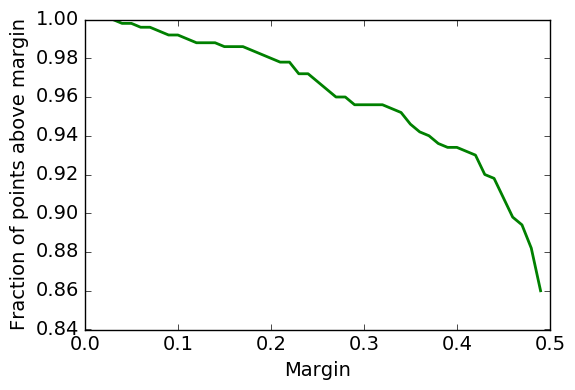

In [113]:
gammas = np.arange(0,0.5,0.01)
f = np.vectorize(lambda g: margin_counts(clf, test_data, g))
plt.plot(gammas, f(gammas)/500.0, linewidth=2, color='green')
plt.xlabel('Margin', fontsize=14)
plt.ylabel('Fraction of points above margin', fontsize=14)
plt.show()

In [114]:
## Return error of predictions that lie in intervals [0, 0.5 - gamma) and (0.5 + gamma, 1]
def margin_errors(clf, test_data, test_labels, gamma):
    ## Compute probability on each test point
    preds = clf.predict_proba(test_data)[:,1]
    
    ## Find data points for which prediction is at least gamma away from 0.5
    margin_inds = np.where((preds > (0.5+gamma)) | (preds < (0.5-gamma)))[0]
    
    ## Compute error on those data points.
    num_errors = np.sum((preds[margin_inds] > 0.5) != (test_labels[margin_inds] > 0.0))
    return float(num_errors)/len(margin_inds)

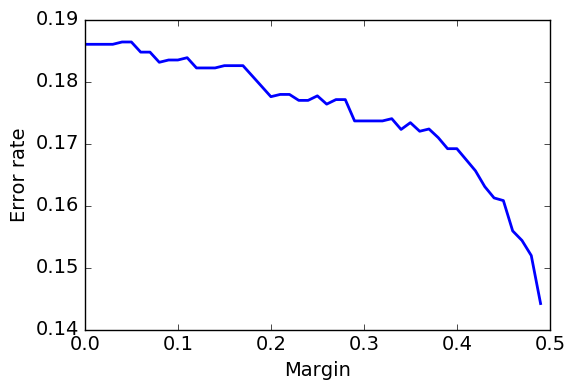

In [115]:
## Create grid of gamma values
gammas = np.arange(0, 0.5, 0.01)

## Compute margin_errors on test data for each value of g
f = np.vectorize(lambda g: margin_errors(clf, test_data, test_labels, g))

## Plot the result
plt.plot(gammas, f(gammas), linewidth=2)
plt.ylabel('Error rate', fontsize=14)
plt.xlabel('Margin', fontsize=14)
plt.show()

## 4. Words with large influence

In [165]:
## Convert vocabulary into a list:
#vectorizer.vocabulary_.items()得出4500个单词的各自的频数dict，key为每个pair的第二个值，即频数
#再用z[0]将第一位提取出来
vocab = np.array([z[0] for z in sorted(vectorizer.vocabulary_.items(), key=lambda x:x[1])], order='K')

## Get indices of sorting w
inds = np.argsort(w)

## Words with large negative values
neg_inds = inds[0:50]
print("Highly negative words: ")
print([str(x) for x in list(vocab[neg_inds])])

## Words with large positive values
pos_inds = inds[-49:-1]
print("Highly positive words: ")
print([str(x) for x in list(vocab[pos_inds])])

Highly negative words: 
['sucks', 'worst', 'bad', 'poor', 'avoid', 'aren', 'bland', 'wasn', 'pm', 'rude', 'started', 'unfortunately', 'directing', 'slow', 'mediocre', 'wasted', 'then', 'disappointment', 'minutes', 'ok', 'stereotypes', 'return', 'stupid', 'wife', 'fly', 'racial', 'literally', 'looks', 'waste', 'fails', 'another', 'ripped', 'low', 'picture', 'dishes', 'within', 'boring', 'make', 'torture', 'awful', 'guess', 'flat', 'green', 'sitting', 'not', 'disappointing', 'put', 'year', 'depth', 'received']
Highly positive words: 
['carry', 'happy', 'amount', 'sauce', 'art', 'tom', 'happier', 'brings', 'steak', 'best', 'wow', 'parts', 'enjoyed', 'cult', 'plays', 'beer', 'incredible', 'angel', 'definitely', 'ponyo', 'years', 'lovely', 'sex', 'family', 'hope', 'fun', 'occasionally', 'love', 'funny', 'decent', 'easy', 'cool', 'exactly', 'amazing', 'joy', 'scamp', 'works', 'awesome', 'delicious', 'great', 'loved', 'fantastic', 'liked', 'interesting', 'beautiful', 'comfortable', 'excellent

In [83]:
vocab2 = np.array([z[0] for z in sorted(vectorizer.vocabulary_.items())])

In [85]:
vocab2[-10:-1]

array(['youthful', 'youtube', 'yucky', 'yukon', 'yum', 'yummy', 'yun',
       'zero', 'zillion'],
      dtype='<U17')

In [76]:
neg_inds

array([3742, 4449,  303, 2769,  275,  205,  429, 4319, 2750, 3187, 3628,
       4131, 1210, 3489, 2288, 4321, 3897, 1225, 2352, 2470, 3653, 3110,
       3711, 4391, 1685, 2941, 2124, 2151, 4320, 1596,  165, 3145, 2179,
       2693, 1241, 4417,  478, 2217, 3993,  283, 1785, 1673, 1776, 3460,
       2445, 1224, 2919, 4476, 1146, 2995], dtype=int64)

In [166]:
vocab[-10:-1]

array(['youthful', 'youtube', 'yucky', 'yukon', 'yum', 'yummy', 'yun',
       'zero', 'zillion'],
      dtype='<U17')

In [134]:
a = np.array(['carry', 'happy', 'amount', 'sauce', 'art', 'tom', 'happier', 'brings', 'steak', 'best', 'wow', 'parts', 'enjoyed', 'cult', 'plays', 'beer', 'incredible', 'angel', 'definitely', 'ponyo', 'years', 'lovely', 'sex', 'family', 'hope', 'fun', 'occasionally', 'love', 'funny', 'decent', 'easy', 'cool', 'exactly', 'amazing', 'joy', 'scamp', 'works', 'awesome', 'delicious', 'great', 'loved', 'fantastic', 'liked', 'interesting', 'beautiful', 'comfortable', 'excellent', 'nice'])

In [130]:
b = np.array(['amount', 'adaptation', 'appreciate', 'hands', 'smoothly', 'sex', 'dialing', 'happier', 'characters', 'cult', 'song', 'emotions', 'works', 'best', 'huge', 'reasonable', 'jawbone', 'watch', 'world', 'incredible', 'shot', 'young', 'winner', 'cool', 'cases', 'perfectly', 'mention', 'sturdy', 'fun', 'amazing', 'type', 'recommended', 'happy', 'awesome', 'fantastic', 'liked', 'enjoyed', 'both', 'beautiful', 'rocks', 'delicious', 'loved', 'excellent', 'love', 'great', 'silent', 'perfect', 'nice'])

In [91]:
a = np.array(a)

In [135]:
len(np.setdiff1d(a,b))

26

In [174]:
list1 = sorted(vectorizer.vocabulary_.items(), key=lambda s:s[1])

In [175]:
list1[-10:]

[('youthful', 4490),
 ('youtube', 4491),
 ('yucky', 4492),
 ('yukon', 4493),
 ('yum', 4494),
 ('yummy', 4495),
 ('yun', 4496),
 ('zero', 4497),
 ('zillion', 4498),
 ('zombie', 4499)]

In [179]:
data_features.shape

(3000, 4500)

In [163]:
vocab = []
for z in list1[:5]:
    vocab.extend(z[0])

In [167]:
list1 = [z[0] for z in sorted(vectorizer.vocabulary_.items(), key=lambda x:x[1])]

In [170]:
list1

['aailiyah',
 'abandoned',
 'abhor',
 'ability',
 'able',
 'abound',
 'about',
 'above',
 'abroad',
 'absolute',
 'absolutel',
 'absolutely',
 'absolutley',
 'abstruse',
 'abysmal',
 'ac',
 'academy',
 'accents',
 'accept',
 'acceptable',
 'access',
 'accessable',
 'accessible',
 'accessing',
 'accessory',
 'accessoryone',
 'accident',
 'accidentally',
 'acclaimed',
 'accolades',
 'accommodations',
 'accomodate',
 'accompanied',
 'according',
 'accordingly',
 'accountant',
 'accurate',
 'accurately',
 'accused',
 'ache',
 'achievement',
 'achille',
 'ackerman',
 'acknowledged',
 'across',
 'act',
 'acted',
 'acting',
 'action',
 'actions',
 'activate',
 'activated',
 'activesync',
 'actor',
 'actors',
 'actress',
 'actresses',
 'actual',
 'actually',
 'ad',
 'adams',
 'adaptation',
 'adapter',
 'adapters',
 'add',
 'added',
 'addition',
 'additional',
 'address',
 'adhesive',
 'admins',
 'admiration',
 'admitted',
 'adorable',
 'adrift',
 'adventure',
 'advertised',
 'advise',
 'aerial

In [154]:
len(vocab)

9000

In [169]:
type(list1)

list